# Portfolio Performance

In [119]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import utils as u
import ffn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [300]:
start = '2022-11-07'
end = '2022-11-19'

In [201]:
df = u.get_updated_data()
df = pd.merge(df, u.get_bloomberg_data(False), how='left', left_index=True, right_index=True)
df = u.add_fx(df)
df.sort_index(ascending=True, inplace=True)

In [62]:
# df_b = u.get_bloomberg_data(True)

In [92]:
weights = {
    'ch': 0.13324,
    'DBC.US': 0.18868,
    'it': 0.1084,
    'SHEL': 0.11132,
    'CSSMI.SW': 0.247,
    'WMT': 0.21136
}

In [203]:
c_ret = u.create_portfolio_returns(df, weights)
c_ret = pd.merge(c_ret, df.pct_change(), how='left', left_index=True, right_index=True)

In [290]:
c_ret

,Portfolio,Risky Portfolio,DBC.US,SHEL,CSSMI.SW,WMT,ch,it,rf,EUR,CHF,spy,SPY
date,,,,,,,,,,,,,
2010-01-05,-0.002206,-0.004598,0.001189,0.001121,-0.004690,-0.009958,NaN,NaN,NaN,-0.003053,-0.003605,0.002647,0.002647
2010-01-06,0.002060,0.003934,0.017808,-0.008169,-0.002888,-0.002233,NaN,NaN,NaN,0.003062,0.006099,0.000704,0.000704
2010-01-07,-0.002700,-0.005584,-0.012442,-0.004846,0.000914,0.000560,NaN,NaN,NaN,-0.006591,-0.006165,0.004221,0.004221
2010-01-08,0.002678,0.005171,-0.000787,-0.001462,0.007767,-0.005039,NaN,NaN,NaN,0.006635,0.010236,0.003328,0.003328
2010-01-11,0.003970,0.007755,-0.003152,0.015604,-0.001209,0.016501,NaN,NaN,NaN,0.007008,0.006959,0.001397,0.001397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,-0.002756,-0.005697,-0.014914,-0.019903,-0.010413,-0.029387,0.0,0.0,0.0,-0.002801,0.022096,-0.008507,-0.008507
2022-11-15,0.010454,0.020724,0.011646,0.029638,0.003332,0.065395,0.0,0.0,0.0,0.002228,0.000850,0.008529,0.008529
2022-11-16,-0.001396,-0.002976,-0.011128,-0.008173,-0.008390,0.007189,0.0,0.0,0.0,0.004252,0.000283,-0.007629,-0.007629


In [294]:
(1+c_ret[start:end]).cumprod()

C:\Users\gobel\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


,Portfolio,Risky Portfolio,DBC.US,SHEL,CSSMI.SW,WMT,ch,it,rf,EUR,CHF,spy,SPY,SXXPIEX
date,,,,,,,,,,,,,,
2010-01-05,0.997794,0.995402,1.001189,1.001121,0.995310,0.990042,NaN,NaN,NaN,0.996947,0.996395,1.002647,1.002647,1.002647
2010-01-06,0.999849,0.999318,1.019017,0.992943,0.992436,0.987832,NaN,NaN,NaN,1.000000,1.002472,1.003353,1.003353,1.003353
2010-01-07,0.997150,0.993738,1.006339,0.988132,0.993342,0.988385,NaN,NaN,NaN,0.993409,0.996292,1.007588,1.007588,1.007588
2010-01-08,0.999820,0.998877,1.005547,0.986687,1.001057,0.983405,NaN,NaN,NaN,1.000000,1.006489,1.010941,1.010941,1.010941
2010-01-11,1.003789,1.006623,1.002377,1.002083,0.999847,0.999632,NaN,NaN,NaN,1.007008,1.013494,1.012353,1.012353,1.012353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,1.970346,2.050273,1.020602,1.638573,2.204575,3.418556,-2.78355,NaN,1.933958,0.716367,1.091162,3.486455,3.486455,3.486455
2022-11-15,1.990944,2.092763,1.032488,1.687136,2.211921,3.642113,-2.78355,NaN,1.933958,0.717963,1.092089,3.516192,3.516192,3.516192
2022-11-16,1.988166,2.086534,1.020998,1.673347,2.193362,3.668297,-2.78355,NaN,1.933958,0.721016,1.092398,3.489367,3.489367,3.489367


In [302]:
(0.019488 - 0.04557/52*2) / (0.005557 * np.sqrt(10))

1.0092490068669608

Returns: 1.9488%
Daily avg. portfolio return: 0.1946% 
Daily standard deviation: 0.5557%


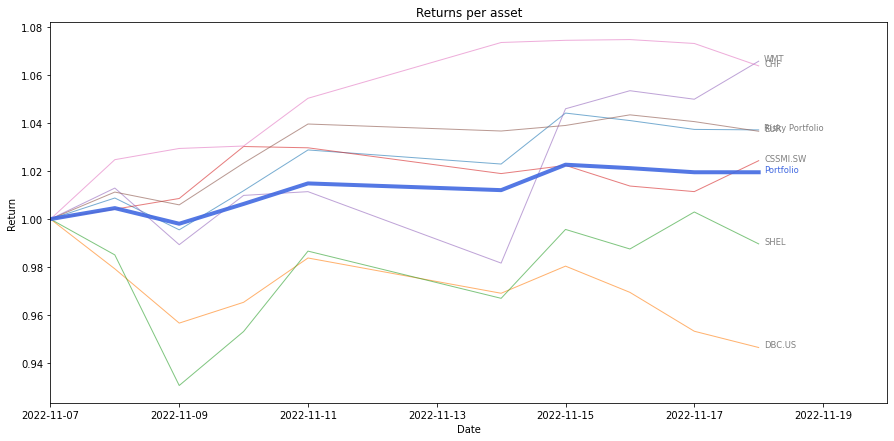

In [301]:
u.portfolio_return(c_ret, start, end)

In [163]:
perf = (1+c_ret).cumprod().calc_stats()
perf.set_riskfree_rate(0.054)
perf.display()

C:\Users\gobel\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
c:\Users\gobel\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
c:\Users\gobel\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\gobel\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Stat                 Portfolio    Risky Portfolio    DBC.US      SHEL        CSSMI.SW    WMT         ch          it          rf          EUR         CHF
-------------------  -----------  -----------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2017-11-14   2017-11-14         2017-11-14  2017-11-14  2017-11-14  2017-11-14  2017-11-14  2017-11-14  2017-11-14  2017-11-14  2017-11-14
End                  2020-11-19   2020-11-19         2020-11-19  2020-11-19  2020-11-19  2020-11-19  2020-11-19  2020-11-19  2020-11-19  2020-11-19  2020-11-19
Risk-free rate       5.40%        5.40%              5.40%       5.40%       5.40%       5.40%       5.40%       5.40%       5.40%       5.40%       5.40%

Total Return         18.51%       20.68%             -13.62%     -38.37%     25.52%      77.63%      187.85%     -100.00%    -83.40%     0.64%       8.59%
Daily Sharpe         0.09         0.14               -0.

c:\Users\gobel\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
c:\Users\gobel\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\gobel\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Risk Metrics

In [251]:
u.check_normality(c_ret.Portfolio)

The portfolio returns are likely not normal.


Text(0, 0.5, 'Observation Frequency')

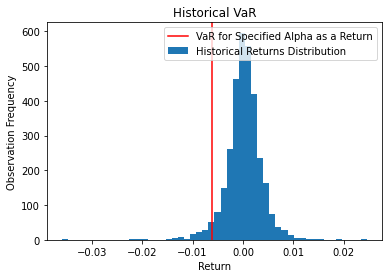

In [78]:
portfolio_VaR = u.value_at_risk(c_ret.Portfolio)
portfolio_VaR_return = portfolio_VaR / 100000000

plt.hist(c_ret.Portfolio, bins=50)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

-1235050.1355998723

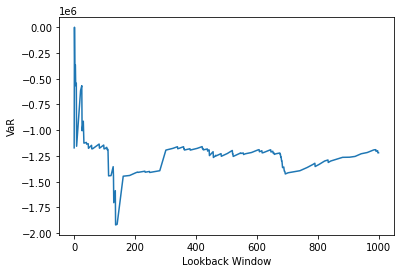

In [79]:
# Test the Value at risk for multiple lookbacks to see if they converge on a value

N = 1000
VaRs = np.zeros((N, 1))
for i in range(N):
    VaRs[i] = u.value_at_risk(c_ret.Portfolio, lookback_days=i) * np.sqrt(5)

plt.plot(VaRs)
plt.xlabel('Lookback Window')
plt.ylabel('VaR')
pd.DataFrame(VaRs)[0].median()

Text(0, 0.5, 'Observation Frequency')

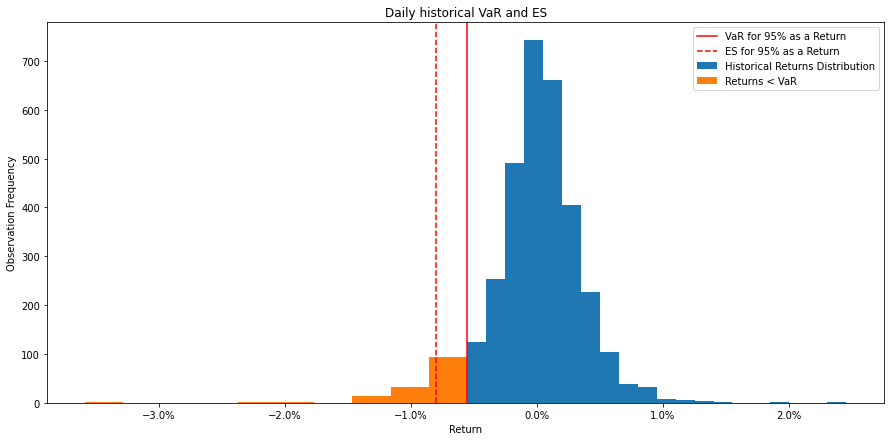

In [80]:
value_invested = 100000000
portfolio_VaR = u.value_at_risk(c_ret.Portfolio, alpha=0.95, lookback_days=500)
portfolio_VaR_return = portfolio_VaR / value_invested

portfolio_CVaR = u.es(c_ret.Portfolio, alpha=0.95, lookback_days=500) 
portfolio_CVaR_return = portfolio_CVaR / value_invested

fig, ax = plt.subplots(figsize=(15,7), facecolor='white')
plt.hist(c_ret.Portfolio[c_ret.Portfolio > portfolio_VaR_return], bins=20)
plt.hist(c_ret.Portfolio[c_ret.Portfolio < portfolio_VaR_return], bins=10)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed')
plt.legend(['VaR for 95% as a Return',
            'ES for 95% as a Return',
            'Historical Returns Distribution', 
            'Returns < VaR'])
plt.title('Daily historical VaR and ES')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

-1965633.1844800443

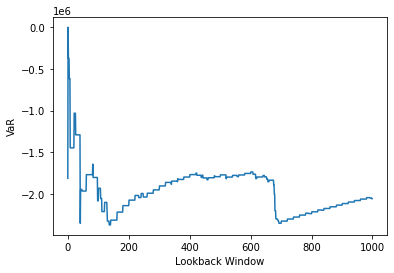

In [81]:
# Get the Expected Shortfall

N = 1000
expected_shortfall = np.zeros((N, 1))
for i in range(N):
    expected_shortfall[i] = u.es(c_ret.Portfolio, lookback_days=i) * np.sqrt(5)

plt.plot(expected_shortfall)
plt.xlabel('Lookback Window')
plt.ylabel('VaR')

pd.DataFrame(expected_shortfall).median()[0]

## Sensitivity

In [268]:
from eod import EodHistoricalData

API_KEY = '' 
client = EodHistoricalData(API_KEY)

In [ ]:
indices = ['SPY', 'DBC.US', 'SXXPIEX']

for i in indices:
    spy = pd.DataFrame(client.get_prices_eod(i, period='d', order='a', from_='2010-01-01'))
    spy.set_index(pd.to_datetime(spy.date), inplace=True)
    c_ret[i] = spy.close.pct_change()

In [292]:
spy = pd.DataFrame(client.get_prices_eod('SPY', period='d', order='a', from_='2010-01-01'))
spy.set_index(pd.to_datetime(spy.date), inplace=True)
c_ret['SPY'] = spy.close.pct_change()

In [293]:
cov = c_ret.cov()
var = c_ret['SPY'].var()
 
cov.loc['Portfolio', 'SPY']/var

0.21466233324348724